<a href="https://colab.research.google.com/github/Vishnuvarthini2005/Vishnu_tvu21021022U18094/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT THE LIBRARIES**

In [1]:
import pandas as pd#for the data frame
import numpy as np#for the numerical
import matplotlib.pyplot as plt #visualization
import seaborn as sns# better visualization

In [2]:
from sklearn.model_selection import train_test_split #to train and test the model
from sklearn.linear_model import LogisticRegression #makes the predictions
from sklearn.metrics import accuracy_score #checks error and accuracy

**LOAD THE DATASET**

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

print("📊 First 5 Rows:")
print(data.head())

print("\n📋 Info:")
print(data.info())

print("\n📈 Summary:")
print(data.describe())


📊 First 5 Rows:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

📋 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox   

**DATA EXPLORATION**

🔍 Missing Values in Each Column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


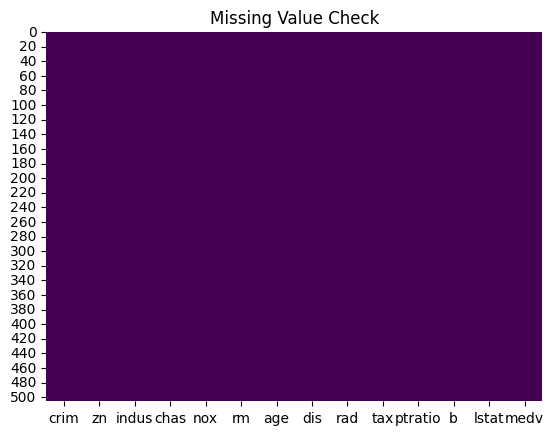

In [5]:
# Step 3A: Check Missing Values
import seaborn as sns
import matplotlib.pyplot as plt

print("🔍 Missing Values in Each Column:")
print(data.isnull().sum())

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Check")
plt.show()


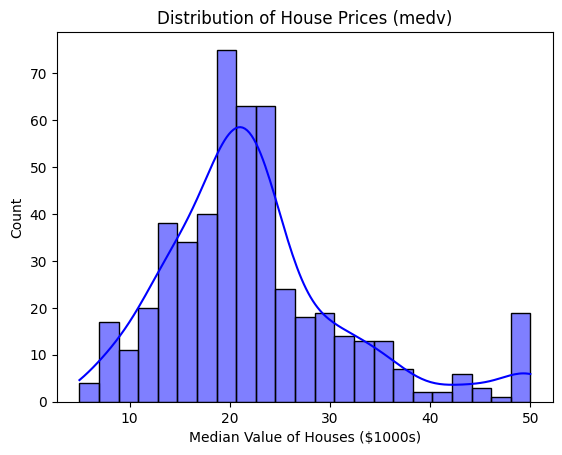

In [6]:
# Step 3B: Distribution of House Prices (Target Variable)
sns.histplot(data['medv'], kde=True, color='blue')
plt.title("Distribution of House Prices (medv)")
plt.xlabel("Median Value of Houses ($1000s)")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


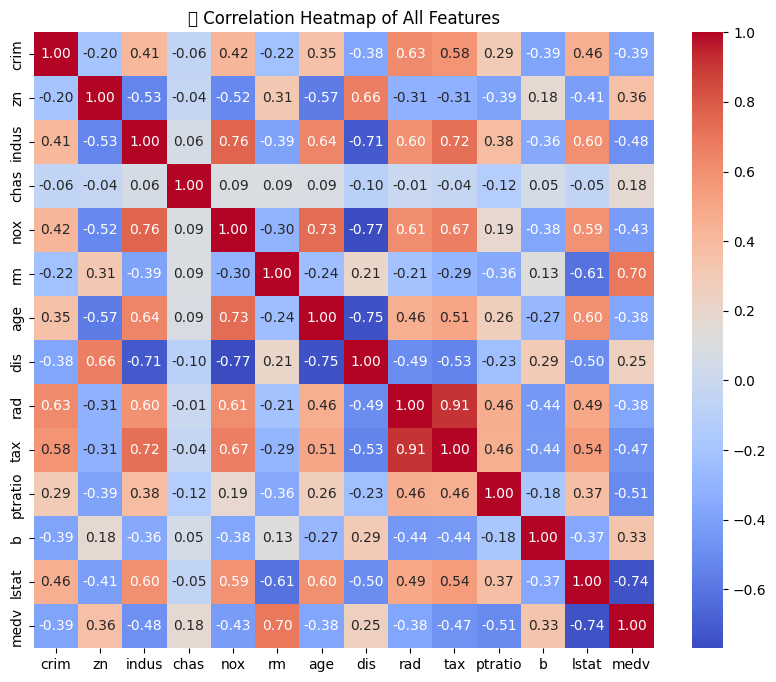

In [7]:
# Step 3C: Correlation Heatmap
corr_matrix = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📈 Correlation Heatmap of All Features")
plt.show()


In [8]:
# 1️⃣ Define features (X) and target (y)
X = data[['rm', 'lstat']]  # most correlated features with price
y = data['medv']            # target column (house price)

# 2️⃣ Split data into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data successfully split!")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

✅ Data successfully split!
Training data shape: (404, 2)
Testing data shape: (102, 2)


In [10]:
# Step 5: Build and Train Linear Regression Model

from sklearn.linear_model import LinearRegression

# 1️⃣ Create model
model = LinearRegression()

# 2️⃣ Train (fit) the model on training data
model.fit(X_train, y_train)

# 3️⃣ Check the coefficients and intercept
print("✅ Model Trained Successfully!\n")

print("Intercept (b):", model.intercept_)
print("Coefficients (m values):", model.coef_)

# 4️⃣ Show feature-impact clearly
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")


✅ Model Trained Successfully!

Intercept (b): -3.8411770790048827
Coefficients (m values): [ 5.46509877 -0.63249856]
rm: 5.47
lstat: -0.63


**MODEL EVALUATION**

In [11]:
# Step 6: Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Predict on the test data
y_pred = model.predict(X_test)

# 2️⃣ Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 3️⃣ Display results
print("✅ Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


✅ Model Evaluation Results:
Mean Squared Error (MSE): 31.24
R-squared (R²): 0.57


**VISUALIZE THE PLOT**

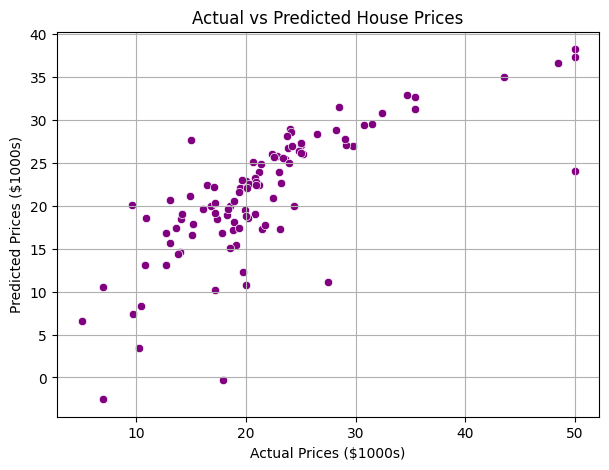

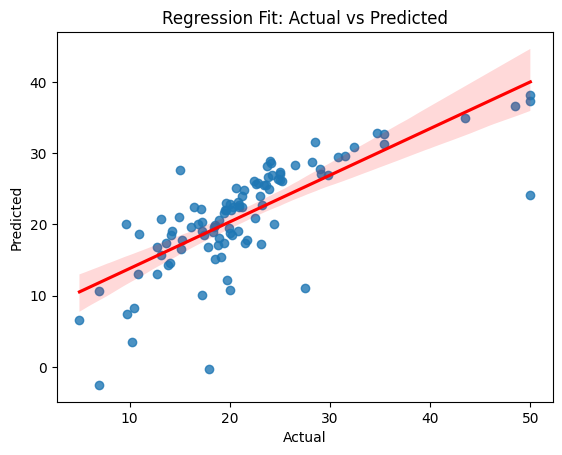

In [12]:
# Step 7: Visualize Actual vs Predicted Prices

import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Create a comparison DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# 2️⃣ Plot Actual vs Predicted values
plt.figure(figsize=(7,5))
sns.scatterplot(x='Actual', y='Predicted', data=results, color='purple')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices ($1000s)')
plt.ylabel('Predicted Prices ($1000s)')
plt.grid(True)
plt.show()

# 3️⃣ Optional: Plot regression line
sns.regplot(x='Actual', y='Predicted', data=results, line_kws={'color':'red'})
plt.title("Regression Fit: Actual vs Predicted")
plt.show()
